In [1]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler as zscore # zscore
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso #LRlasso
from joblib import dump, load #to save models in files
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re
import json
from datetime import datetime
import os


In [18]:

path_gc = "/home/t44p/PW_rawdata/results/full_lasso/gcms/"
lasso_gcms = {}


# Iterate over each file in the directory


for file in os.listdir(path_gc):
    print(file)
    if file.endswith(".json") and not(file.startswith('gcms_dict_nXcv') or file.startswith('lcms_dict_nXcv')):
        file_path = os.path.join(path_gc, file)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
        
        # Extract mean scores and fold scores
        print(file)
        
            
        all_means = data['mean_scores']
        all_fold_scores = []
        for item, values in data['scores'].items():
            all_fold_scores.extend(values['fold_scores'])

        # Use file name without extension as the key
        file_name = os.path.splitext(file)[0]
        lasso_gcms[file_name] = {
            'all_mean_scores': all_means,
            'mean_10x': np.mean(all_means),
            'all_fold_scores': all_fold_scores
        }



Cellobiose_361_204_rt14_40_nXcv.json
Cellobiose_361_204_rt14_40_nXcv.json
tyrosine_218_280_rt10_78_nXcv.json
tyrosine_218_280_rt10_78_nXcv.json
threonic_acid_292_220_rt7_49_nXcv.json
threonic_acid_292_220_rt7_49_nXcv.json
goea
isoleucin_158_233_rt_5_21_nXcv.json
isoleucin_158_233_rt_5_21_nXcv.json
asparagine_116_188_rt9_00_nXcv.json
asparagine_116_188_rt9_00_nXcv.json
adenine_264_279_rt11_12_nXcv.json
adenine_264_279_rt11_12_nXcv.json
glycerol_117_205_rt4_75_nXcv.json
glycerol_117_205_rt4_75_nXcv.json
raffinose_437_451_rt16_91_nXcv.json
raffinose_437_451_rt16_91_nXcv.json
adenosine_5_monophosphate_169__nXcv.json
adenosine_5_monophosphate_169__nXcv.json
ornithine_142_174_rt9_34_nXcv.json
ornithine_142_174_rt9_34_nXcv.json
glucose_160_rt9_81_nXcv.json
glucose_160_rt9_81_nXcv.json
inositol_myo_305_265_rt10_71_nXcv.json
inositol_myo_305_265_rt10_71_nXcv.json
phosphoric_acid_314_299_rt_5_4_nXcv.json
phosphoric_acid_314_299_rt_5_4_nXcv.json
sucrose_437_361_rt13_77_nXcv.json
sucrose_437_361_r

In [19]:

path_gc = "/home/t44p/PW_rawdata/results/test_rfr/gcms"
rfr_gcms = {}


# Iterate over each file in the directory


for file in os.listdir(path_gc):
    print(file)
    if file.endswith(".json") and not(file.startswith('gcms_dict_nXcv') or file.startswith('lcms_dict_nXcv')):
        file_path = os.path.join(path_gc, file)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
        
        # Extract mean scores and fold scores
        print(file)
        
            
        all_means = data['mean_scores']
        all_fold_scores = []
        for item, values in data['scores'].items():
            all_fold_scores.extend(values['fold_scores'])

        # Use file name without extension as the key
        file_name = os.path.splitext(file)[0]
        rfr_gcms[file_name] = {
            'all_mean_scores': all_means,
            'mean_10x': np.mean(all_means),
            'all_fold_scores': all_fold_scores
        }



Cellobiose_361_204_rt14_40_nXcv.json
Cellobiose_361_204_rt14_40_nXcv.json
tyrosine_218_280_rt10_78_nXcv.json
tyrosine_218_280_rt10_78_nXcv.json
threonic_acid_292_220_rt7_49_nXcv.json
threonic_acid_292_220_rt7_49_nXcv.json
isoleucin_158_233_rt_5_21_nXcv.json
isoleucin_158_233_rt_5_21_nXcv.json
asparagine_116_188_rt9_00_nXcv.json
asparagine_116_188_rt9_00_nXcv.json
adenine_264_279_rt11_12_nXcv.json
adenine_264_279_rt11_12_nXcv.json
glycerol_117_205_rt4_75_nXcv.json
glycerol_117_205_rt4_75_nXcv.json
raffinose_437_451_rt16_91_nXcv.json
raffinose_437_451_rt16_91_nXcv.json
adenosine_5_monophosphate_169__nXcv.json
adenosine_5_monophosphate_169__nXcv.json
ornithine_142_174_rt9_34_nXcv.json
ornithine_142_174_rt9_34_nXcv.json
glucose_160_rt9_81_nXcv.json
glucose_160_rt9_81_nXcv.json
inositol_myo_305_265_rt10_71_nXcv.json
inositol_myo_305_265_rt10_71_nXcv.json
phosphoric_acid_314_299_rt_5_4_nXcv.json
phosphoric_acid_314_299_rt_5_4_nXcv.json
sucrose_437_361_rt13_77_nXcv.json
sucrose_437_361_rt13_7

In [29]:
lasso_gcms['Cellobiose_361_204_rt14_40_nXcv']['all_fold_scores']

[0.4044767803400028,
 0.5680688697122551,
 0.4570921446544345,
 0.19545741053054122,
 0.24219112235998086,
 0.5286482265139973,
 0.4120694567811142,
 0.7389263038813751,
 -0.49629152582434033,
 0.4689251940250596,
 0.16726618941461335,
 0.5512050746142537,
 0.7683887720825585,
 0.015290722192555672,
 0.46417131029205927,
 0.7172441850531243,
 0.45368517809971987,
 0.3569175337690095,
 0.19587919671247667,
 0.15490864805368854,
 0.6192119009710695,
 0.07161368300119686,
 -0.620987723515837,
 0.5731741727227306,
 0.20203520480807424,
 0.5160626550030813,
 0.6323959579475795,
 0.4823545956047435,
 0.3756196310705008,
 0.3769891889425182,
 0.35515174662506677,
 0.3431793672023238,
 0.2865397704648748]

## Distribution of foldscore variance

shows how many models have e.g. 0.4 to 0.45

In [30]:
lasso_gcms_variances = []
lasso_gcms_variances = [np.var(target_data['all_fold_scores']) for target_data in lasso_gcms.values()]


In [32]:
max(lasso_gcms_variances)

4.689657613703287

In [34]:
rfr_gcms_variances = []
rfr_gcms_variances = [np.var(target_data['all_fold_scores']) for target_data in rfr_gcms.values()]

In [35]:
max(rfr_gcms_variances)

1.2700478360271452

### Lasso foldscore variance 

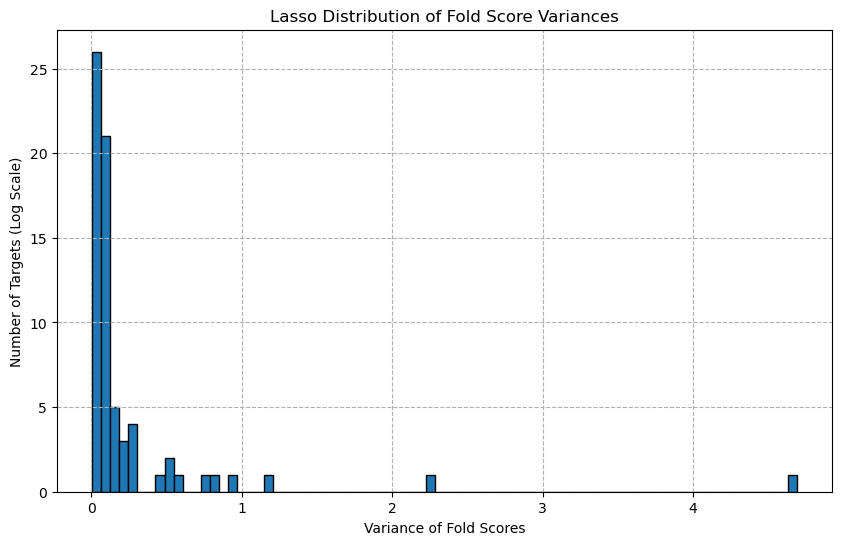

In [40]:

# Find the maximum variance to define the end of the bin range
max_variance = max(lasso_gcms_variances)

# Define the number of bins or use 'auto' for automatic binning
num_bins = 'auto'  # You can also specify an integer for a fixed number of bins

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(lasso_gcms_variances, bins=num_bins, edgecolor='black')  # Note the log=True parameter
plt.title('Lasso Distribution of Fold Score Variances')
plt.xlabel('Variance of Fold Scores')
plt.ylabel('Number of Targets (Log Scale)')
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks
plt.show()


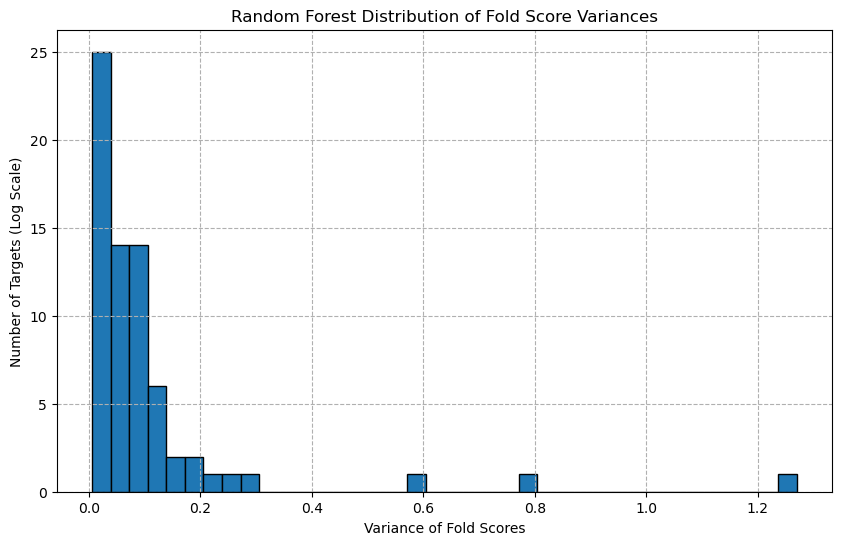

In [41]:

# Find the maximum variance to define the end of the bin range
max_variance = max(rfr_gcms_variances)

# Define the number of bins or use 'auto' for automatic binning
num_bins = 'auto'  # You can also specify an integer for a fixed number of bins

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(rfr_gcms_variances, bins=num_bins, edgecolor='black')  # Note the log=True parameter
plt.title('Random Forest Distribution of Fold Score Variances')
plt.xlabel('Variance of Fold Scores')
plt.ylabel('Number of Targets (Log Scale)')
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks
plt.show()


# fold scores

### Lasso


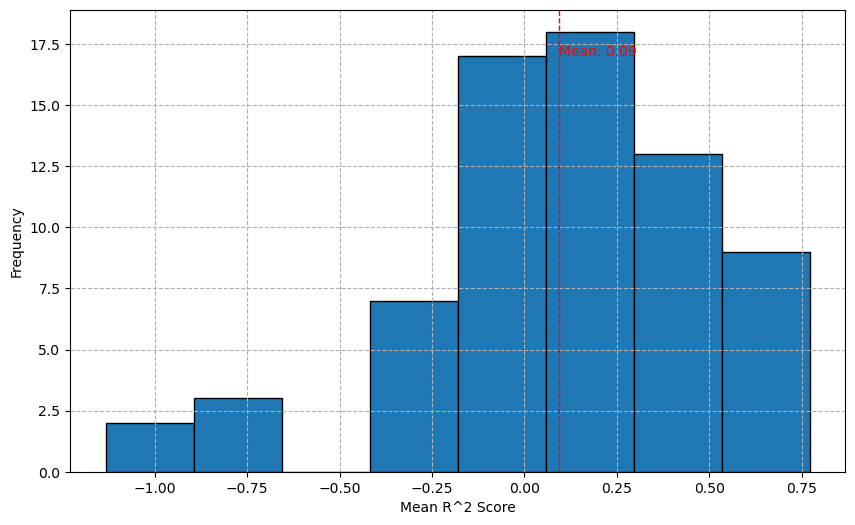

In [42]:
plt.figure(figsize=(10, 6))

# Logarithmic scale for x-axis
all_mean_scores = [lasso_gcms[target_data]['mean_10x'] for target_data in lasso_gcms.keys()]

bin_edges = np.histogram_bin_edges(all_mean_scores, bins='auto')
plt.hist(all_mean_scores, bins=bin_edges, edgecolor='black')#, log=True)

plt.xlabel('Mean R^2 Score')
plt.ylabel('Frequency')
#plt.title('Distribution of Mean \( R^2 \) Scores Across Targets')
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks

# Annotation for mean or median
mean_score = np.mean(all_mean_scores)
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_score, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_score:.2f}', color = 'red')

plt.show()


### Random Forest

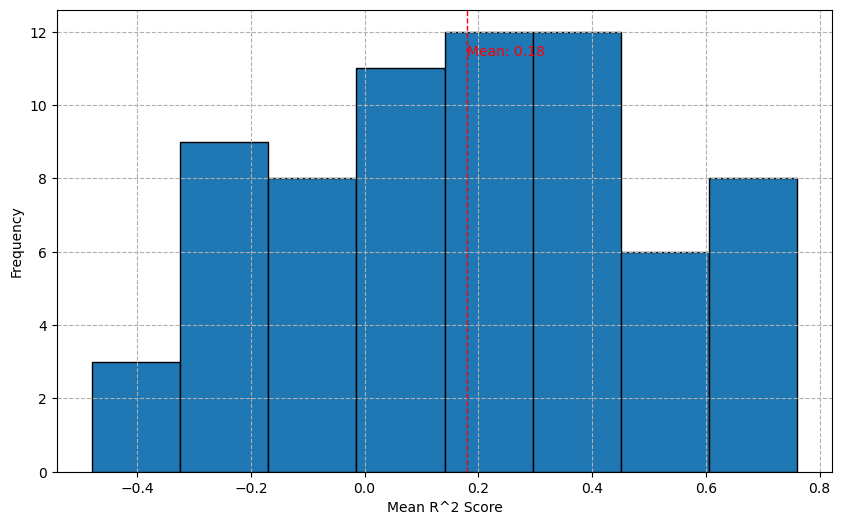

In [43]:
plt.figure(figsize=(10, 6))

# Logarithmic scale for x-axis
all_mean_scores = [rfr_gcms[target_data]['mean_10x'] for target_data in rfr_gcms.keys()]

bin_edges = np.histogram_bin_edges(all_mean_scores, bins='auto')
plt.hist(all_mean_scores, bins=bin_edges, edgecolor='black')#, log=True)

plt.xlabel('Mean R^2 Score')
plt.ylabel('Frequency')
#plt.title('Distribution of Mean \( R^2 \) Scores Across Targets')
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks

# Annotation for mean or median
mean_score = np.mean(all_mean_scores)
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_score, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_score:.2f}', color = 'red')

plt.show()
